# Approaches to Newcastle

### Step 1: Prepare a csv file using excel (note: formatting works better with old excel version)

#### 1a Import data from csv - pandas

In [1]:
import os
import pandas as pd

In [2]:
#import from csv
in_csv = r"E:\HIPP\11_Deliverables\06_Oceanography\01_DeployedEquipment\DeployedEquipment.csv"
df = pd.read_csv(in_csv)
print((df.columns))
# print(len(df))
df_iloc = df.iloc[[0,len(df)/5,len(df)*2.5/5,len(df)*4/5,-1]]
df_iloc
df
# sdf_iloc[['comment', 'index', 'svp_file', 'date','svp_url','sample_num', 'svp_source','e_utm56s','n_utm56s']]

Index(['Date_UTC', 'Time_UTC', 'Date_LCL', 'Time_LCL', 'ID', 'LAT', 'LON',
       'E_UTM56S', 'N_UTM56S', 'Depth_m', 'RecoveredDateUTC',
       'RecoveredTimeUTC', 'RecoveredDateLCL', 'RecoveredTimeLCL', 'Days'],
      dtype='object')


,Date_UTC,Time_UTC,Date_LCL,Time_LCL,ID,LAT,LON,E_UTM56S,N_UTM56S,Depth_m,RecoveredDateUTC,RecoveredTimeUTC,RecoveredDateLCL,RecoveredTimeLCL,Days
0,07/12/2020,10:35:00,07/12/2020,21:35:00,CM1 & TG01 & TG01A,-32.796915,-152.073343,413236.260,6370846.660,25,15/01/2021,06:48:00,15/01/2021,17:48:00,38.84
1,08/12/2020,22:38:00,09/12/2020,09:38:00,TG02 & TG02A,-32.853917,-152.145600,420053.013,6364584.287,107,15/01/2021,05:10:00,15/01/2021,16:10:00,37.27
2,08/12/2020,23:50:00,01/01/1900,11:00:00,GNSS Bouy01_01 (TG1),-32.802716,-152.076691,413555.330,6370206.250,0,17/12/2020,20:00:00,18/12/2020,07:00:00,8.84
3,09/12/2020,02:47:00,09/12/2020,13:48:00,CM2 weight,-32.938325,-151.843178,391856.400,6354956.620,32,14/01/2021,08:30:00,14/01/2021,19:30:00,78.69
4,09/12/2020,02:47:00,09/12/2020,13:48:00,CM2 frame,-32.938508,-151.843285,391866.585,6354936.441,32,14/01/2021,08:30:00,14/01/2021,19:30:00,78.69
5,09/12/2020,03:38:00,09/12/2020,14:38:00,TG-3,-32.996724,-151.779869,386012.750,6348415.220,35,MISSING,MISSING,MISSING,MISSING,78.65
6,09/12/2020,03:45:00,10/12/2020,14:45:00,GNSS Bouy02_01 (TG3),-32.997520,-151.779150,385946.530,6348326.150,35,23/12/2020,01:20:00,24/12/2020,12:20:00,13.90
7,09/12/2020,05:18:00,09/12/2020,16:18:00,TG-4,-33.053307,-151.856632,393252.730,6342222.400,96,15/01/2021,01:50:00,15/01/2021,12:50:00,36.86
8,22/12/2020,13:48:00,01/01/1900,11:00:00,GNSS Bouy01_02 (TG2),-32.855623,-152.144112,419915.280,6364394.000,0,26/12/2020,00:54:00,26/12/2020,11:54:00,3.44
9,25/12/2020,23:24:00,26/12/2020,10:24:00,GNSS Bouy02_02 (TG1),-32.799149,-152.073765,413277.860,6370599.300,0,03/01/2021,20:30:00,04/01/2021,07:30:00,8.97


#### 1b. lowercase all column names

In [3]:
#add FID: not neccessary if generating shp file using ESRI tool
# df['FID'] = [i for i in range(len(df))] #auto add FID col
#change col names
column_names={"Date_UTC":"sampling_date","ID":"sample_name"}
df = df.rename(columns=column_names) #rename
df = df.rename(columns=str.lower,inplace=False) #renametolowercase
#get column names and sort by alphabet
new_col_names = list(df.columns)
# print(new_col_names)
# new_col_names.sort()
# new_col_names
#change to the order we want manually
# new_col_names = ['fid','sample_id', 'date_utc', 'time_utc', 'lat', 'lon', 'depth', 
#                'method', 'recovery', 'weight', 'name', 'composition', 
#                'class', 'hue_card', 'hue_value', 'file_name', 'sample_held', 
#                'obs_sig', 'anoxic_sediments', 'comments', 'sample', 'url', 
#                'e_utm56s', 'n_utm56s']
# new_col_names
#re_oder the dataframe
# df = df[new_col_names]
df_iloc = df.iloc[[0,len(df)/5,len(df)*2.5/5,len(df)*4/5,-1]]
print((df.columns))
df_iloc



Index(['sampling_date', 'time_utc', 'date_lcl', 'time_lcl', 'sample_name',
       'lat', 'lon', 'e_utm56s', 'n_utm56s', 'depth_m', 'recovereddateutc',
       'recoveredtimeutc', 'recovereddatelcl', 'recoveredtimelcl', 'days'],
      dtype='object')


,sampling_date,time_utc,date_lcl,time_lcl,sample_name,lat,lon,e_utm56s,n_utm56s,depth_m,recovereddateutc,recoveredtimeutc,recovereddatelcl,recoveredtimelcl,days
0,07/12/2020,10:35:00,07/12/2020,21:35:00,CM1 & TG01 & TG01A,-32.796915,-152.073343,413236.26,6370846.66,25,15/01/2021,06:48:00,15/01/2021,17:48:00,38.84
2,08/12/2020,23:50:00,01/01/1900,11:00:00,GNSS Bouy01_01 (TG1),-32.802716,-152.076691,413555.33,6370206.25,0,17/12/2020,20:00:00,18/12/2020,07:00:00,8.84
5,09/12/2020,03:38:00,09/12/2020,14:38:00,TG-3,-32.996724,-151.779869,386012.75,6348415.22,35,MISSING,MISSING,MISSING,MISSING,78.65
8,22/12/2020,13:48:00,01/01/1900,11:00:00,GNSS Bouy01_02 (TG2),-32.855623,-152.144112,419915.28,6364394.00,0,26/12/2020,00:54:00,26/12/2020,11:54:00,3.44
10,27/12/2020,02:02:00,28/12/2020,13:02:00,GNSS Bouy01_03 (TG4),-33.053184,-151.855299,393128.10,6342234.72,98,01/01/2021,22:48:00,02/01/2021,09:48:00,5.87


#### add columns: remarks, data_url and equipment name

In [4]:
#add data_url and remarks columns
if 'data_url' not in list(df.columns): df['data_url']=''
if 'remarks' not in list(df.columns): df['remarks']=df['sample_name']
if 'equipment_name' not in list(df.columns): df['equipment_name']=df['sample_name']
if 'penetrate' not in list(df.columns): df['penetrate']=0
if 'recovery' not in list(df.columns): df['recovery']=100
if 'report_url' not in list(df.columns): df['report_url']=''
if 'sample_desc' not in list(df.columns): df['sample_desc']=''
df

,sampling_date,time_utc,date_lcl,time_lcl,sample_name,lat,lon,e_utm56s,n_utm56s,depth_m,...,recovereddatelcl,recoveredtimelcl,days,data_url,remarks,equipment_name,penetrate,recovery,report_url,sample_desc
0,07/12/2020,10:35:00,07/12/2020,21:35:00,CM1 & TG01 & TG01A,-32.796915,-152.073343,413236.260,6370846.660,25,...,15/01/2021,17:48:00,38.84,,CM1 & TG01 & TG01A,CM1 & TG01 & TG01A,0,100,,
1,08/12/2020,22:38:00,09/12/2020,09:38:00,TG02 & TG02A,-32.853917,-152.145600,420053.013,6364584.287,107,...,15/01/2021,16:10:00,37.27,,TG02 & TG02A,TG02 & TG02A,0,100,,
2,08/12/2020,23:50:00,01/01/1900,11:00:00,GNSS Bouy01_01 (TG1),-32.802716,-152.076691,413555.330,6370206.250,0,...,18/12/2020,07:00:00,8.84,,GNSS Bouy01_01 (TG1),GNSS Bouy01_01 (TG1),0,100,,
3,09/12/2020,02:47:00,09/12/2020,13:48:00,CM2 weight,-32.938325,-151.843178,391856.400,6354956.620,32,...,14/01/2021,19:30:00,78.69,,CM2 weight,CM2 weight,0,100,,
4,09/12/2020,02:47:00,09/12/2020,13:48:00,CM2 frame,-32.938508,-151.843285,391866.585,6354936.441,32,...,14/01/2021,19:30:00,78.69,,CM2 frame,CM2 frame,0,100,,
5,09/12/2020,03:38:00,09/12/2020,14:38:00,TG-3,-32.996724,-151.779869,386012.750,6348415.220,35,...,MISSING,MISSING,78.65,,TG-3,TG-3,0,100,,
6,09/12/2020,03:45:00,10/12/2020,14:45:00,GNSS Bouy02_01 (TG3),-32.997520,-151.779150,385946.530,6348326.150,35,...,24/12/2020,12:20:00,13.90,,GNSS Bouy02_01 (TG3),GNSS Bouy02_01 (TG3),0,100,,
7,09/12/2020,05:18:00,09/12/2020,16:18:00,TG-4,-33.053307,-151.856632,393252.730,6342222.400,96,...,15/01/2021,12:50:00,36.86,,TG-4,TG-4,0,100,,
8,22/12/2020,13:48:00,01/01/1900,11:00:00,GNSS Bouy01_02 (TG2),-32.855623,-152.144112,419915.280,6364394.000,0,...,26/12/2020,11:54:00,3.44,,GNSS Bouy01_02 (TG2),GNSS Bouy01_02 (TG2),0,100,,
9,25/12/2020,23:24:00,26/12/2020,10:24:00,GNSS Bouy02_02 (TG1),-32.799149,-152.073765,413277.860,6370599.300,0,...,04/01/2021,07:30:00,8.97,,GNSS Bouy02_02 (TG1),GNSS Bouy02_02 (TG1),0,100,,


#### add CM1 row into the table

In [5]:
#Get a row content by convert a row (pandas series) to a dictionary
TG1 = dict(df.iloc[0])
TG1
#create content for new row current meter 01 based on TG1
#only the id changed.
CM01 = {'sampling_date': '07/12/2020',
 'time_utc': '10:35:00',
 'date_lcl': '07/12/2020',
 'time_lcl': '21:35:00',
 'sample_name': 'CM1',
 'lat': -32.7969148333,
 'lon': -152.0733435,
 'e_utm56s': 413236.26,
 'n_utm56s': 6370846.66,
 'depth_m': 25,
 'recovereddateutc': '15/01/2021',
 'recoveredtimeutc': '06:48:00',
 'recovereddatelcl': '15/01/2021',
 'recoveredtimelcl': '17:48:00',
 'days': 38.84,
 'data_url': ''}

# add new row
if 'CM1' not in list(df['sample_name']):
    df = df.append(CM01,ignore_index=True)
else: 
    print('CM1 is in the dataframe')
#sort by date
df = df.sort_values(by=['sample_name'])
df

,sampling_date,time_utc,date_lcl,time_lcl,sample_name,lat,lon,e_utm56s,n_utm56s,depth_m,...,recovereddatelcl,recoveredtimelcl,days,data_url,remarks,equipment_name,penetrate,recovery,report_url,sample_desc
11,07/12/2020,10:35:00,07/12/2020,21:35:00,CM1,-32.796915,-152.073343,413236.260,6370846.660,25,...,15/01/2021,17:48:00,38.84,,NaN,NaN,NaN,NaN,NaN,NaN
0,07/12/2020,10:35:00,07/12/2020,21:35:00,CM1 & TG01 & TG01A,-32.796915,-152.073343,413236.260,6370846.660,25,...,15/01/2021,17:48:00,38.84,,CM1 & TG01 & TG01A,CM1 & TG01 & TG01A,0.0,100.0,,
4,09/12/2020,02:47:00,09/12/2020,13:48:00,CM2 frame,-32.938508,-151.843285,391866.585,6354936.441,32,...,14/01/2021,19:30:00,78.69,,CM2 frame,CM2 frame,0.0,100.0,,
3,09/12/2020,02:47:00,09/12/2020,13:48:00,CM2 weight,-32.938325,-151.843178,391856.400,6354956.620,32,...,14/01/2021,19:30:00,78.69,,CM2 weight,CM2 weight,0.0,100.0,,
2,08/12/2020,23:50:00,01/01/1900,11:00:00,GNSS Bouy01_01 (TG1),-32.802716,-152.076691,413555.330,6370206.250,0,...,18/12/2020,07:00:00,8.84,,GNSS Bouy01_01 (TG1),GNSS Bouy01_01 (TG1),0.0,100.0,,
8,22/12/2020,13:48:00,01/01/1900,11:00:00,GNSS Bouy01_02 (TG2),-32.855623,-152.144112,419915.280,6364394.000,0,...,26/12/2020,11:54:00,3.44,,GNSS Bouy01_02 (TG2),GNSS Bouy01_02 (TG2),0.0,100.0,,
10,27/12/2020,02:02:00,28/12/2020,13:02:00,GNSS Bouy01_03 (TG4),-33.053184,-151.855299,393128.100,6342234.720,98,...,02/01/2021,09:48:00,5.87,,GNSS Bouy01_03 (TG4),GNSS Bouy01_03 (TG4),0.0,100.0,,
6,09/12/2020,03:45:00,10/12/2020,14:45:00,GNSS Bouy02_01 (TG3),-32.997520,-151.779150,385946.530,6348326.150,35,...,24/12/2020,12:20:00,13.90,,GNSS Bouy02_01 (TG3),GNSS Bouy02_01 (TG3),0.0,100.0,,
9,25/12/2020,23:24:00,26/12/2020,10:24:00,GNSS Bouy02_02 (TG1),-32.799149,-152.073765,413277.860,6370599.300,0,...,04/01/2021,07:30:00,8.97,,GNSS Bouy02_02 (TG1),GNSS Bouy02_02 (TG1),0.0,100.0,,
5,09/12/2020,03:38:00,09/12/2020,14:38:00,TG-3,-32.996724,-151.779869,386012.750,6348415.220,35,...,MISSING,MISSING,78.65,,TG-3,TG-3,0.0,100.0,,


In [6]:
#drop the CM2 frame row
if 4 in list(df.index):
    df = df.drop(4)
df

,sampling_date,time_utc,date_lcl,time_lcl,sample_name,lat,lon,e_utm56s,n_utm56s,depth_m,...,recovereddatelcl,recoveredtimelcl,days,data_url,remarks,equipment_name,penetrate,recovery,report_url,sample_desc
11,07/12/2020,10:35:00,07/12/2020,21:35:00,CM1,-32.796915,-152.073343,413236.260,6370846.660,25,...,15/01/2021,17:48:00,38.84,,NaN,NaN,NaN,NaN,NaN,NaN
0,07/12/2020,10:35:00,07/12/2020,21:35:00,CM1 & TG01 & TG01A,-32.796915,-152.073343,413236.260,6370846.660,25,...,15/01/2021,17:48:00,38.84,,CM1 & TG01 & TG01A,CM1 & TG01 & TG01A,0.0,100.0,,
3,09/12/2020,02:47:00,09/12/2020,13:48:00,CM2 weight,-32.938325,-151.843178,391856.400,6354956.620,32,...,14/01/2021,19:30:00,78.69,,CM2 weight,CM2 weight,0.0,100.0,,
2,08/12/2020,23:50:00,01/01/1900,11:00:00,GNSS Bouy01_01 (TG1),-32.802716,-152.076691,413555.330,6370206.250,0,...,18/12/2020,07:00:00,8.84,,GNSS Bouy01_01 (TG1),GNSS Bouy01_01 (TG1),0.0,100.0,,
8,22/12/2020,13:48:00,01/01/1900,11:00:00,GNSS Bouy01_02 (TG2),-32.855623,-152.144112,419915.280,6364394.000,0,...,26/12/2020,11:54:00,3.44,,GNSS Bouy01_02 (TG2),GNSS Bouy01_02 (TG2),0.0,100.0,,
10,27/12/2020,02:02:00,28/12/2020,13:02:00,GNSS Bouy01_03 (TG4),-33.053184,-151.855299,393128.100,6342234.720,98,...,02/01/2021,09:48:00,5.87,,GNSS Bouy01_03 (TG4),GNSS Bouy01_03 (TG4),0.0,100.0,,
6,09/12/2020,03:45:00,10/12/2020,14:45:00,GNSS Bouy02_01 (TG3),-32.997520,-151.779150,385946.530,6348326.150,35,...,24/12/2020,12:20:00,13.90,,GNSS Bouy02_01 (TG3),GNSS Bouy02_01 (TG3),0.0,100.0,,
9,25/12/2020,23:24:00,26/12/2020,10:24:00,GNSS Bouy02_02 (TG1),-32.799149,-152.073765,413277.860,6370599.300,0,...,04/01/2021,07:30:00,8.97,,GNSS Bouy02_02 (TG1),GNSS Bouy02_02 (TG1),0.0,100.0,,
5,09/12/2020,03:38:00,09/12/2020,14:38:00,TG-3,-32.996724,-151.779869,386012.750,6348415.220,35,...,MISSING,MISSING,78.65,,TG-3,TG-3,0.0,100.0,,
7,09/12/2020,05:18:00,09/12/2020,16:18:00,TG-4,-33.053307,-151.856632,393252.730,6342222.400,96,...,15/01/2021,12:50:00,36.86,,TG-4,TG-4,0.0,100.0,,


In [7]:
df.at[0,'sample_name'] = 'TG01 & TG01A'
df.at[3,'sample_name'] = 'CM2'
df

,sampling_date,time_utc,date_lcl,time_lcl,sample_name,lat,lon,e_utm56s,n_utm56s,depth_m,...,recovereddatelcl,recoveredtimelcl,days,data_url,remarks,equipment_name,penetrate,recovery,report_url,sample_desc
11,07/12/2020,10:35:00,07/12/2020,21:35:00,CM1,-32.796915,-152.073343,413236.260,6370846.660,25,...,15/01/2021,17:48:00,38.84,,NaN,NaN,NaN,NaN,NaN,NaN
0,07/12/2020,10:35:00,07/12/2020,21:35:00,TG01 & TG01A,-32.796915,-152.073343,413236.260,6370846.660,25,...,15/01/2021,17:48:00,38.84,,CM1 & TG01 & TG01A,CM1 & TG01 & TG01A,0.0,100.0,,
3,09/12/2020,02:47:00,09/12/2020,13:48:00,CM2,-32.938325,-151.843178,391856.400,6354956.620,32,...,14/01/2021,19:30:00,78.69,,CM2 weight,CM2 weight,0.0,100.0,,
2,08/12/2020,23:50:00,01/01/1900,11:00:00,GNSS Bouy01_01 (TG1),-32.802716,-152.076691,413555.330,6370206.250,0,...,18/12/2020,07:00:00,8.84,,GNSS Bouy01_01 (TG1),GNSS Bouy01_01 (TG1),0.0,100.0,,
8,22/12/2020,13:48:00,01/01/1900,11:00:00,GNSS Bouy01_02 (TG2),-32.855623,-152.144112,419915.280,6364394.000,0,...,26/12/2020,11:54:00,3.44,,GNSS Bouy01_02 (TG2),GNSS Bouy01_02 (TG2),0.0,100.0,,
10,27/12/2020,02:02:00,28/12/2020,13:02:00,GNSS Bouy01_03 (TG4),-33.053184,-151.855299,393128.100,6342234.720,98,...,02/01/2021,09:48:00,5.87,,GNSS Bouy01_03 (TG4),GNSS Bouy01_03 (TG4),0.0,100.0,,
6,09/12/2020,03:45:00,10/12/2020,14:45:00,GNSS Bouy02_01 (TG3),-32.997520,-151.779150,385946.530,6348326.150,35,...,24/12/2020,12:20:00,13.90,,GNSS Bouy02_01 (TG3),GNSS Bouy02_01 (TG3),0.0,100.0,,
9,25/12/2020,23:24:00,26/12/2020,10:24:00,GNSS Bouy02_02 (TG1),-32.799149,-152.073765,413277.860,6370599.300,0,...,04/01/2021,07:30:00,8.97,,GNSS Bouy02_02 (TG1),GNSS Bouy02_02 (TG1),0.0,100.0,,
5,09/12/2020,03:38:00,09/12/2020,14:38:00,TG-3,-32.996724,-151.779869,386012.750,6348415.220,35,...,MISSING,MISSING,78.65,,TG-3,TG-3,0.0,100.0,,
7,09/12/2020,05:18:00,09/12/2020,16:18:00,TG-4,-33.053307,-151.856632,393252.730,6342222.400,96,...,15/01/2021,12:50:00,36.86,,TG-4,TG-4,0.0,100.0,,


In [8]:
#update url columns
#get dictionary of id and data_url
index_dataurl = dict(zip(df.sample_name,df.data_url))
print(index_dataurl)

#assign new values for data_url based on id
id_dataurl_new = {'CM1': '11_FinalDeliverables\\05_Tide\\04_CurrentMeters\\CM1', 
                     'TG01 & TG01A': '11_FinalDeliverables\\05_Tide\\02_SeabedMountedTideGauges\\TG01', 
                     'CM2': '11_FinalDeliverables\\05_Tide\\04_CurrentMeters\\CM2', 
                     'GNSS Bouy01_01  (TG1)': '11_FinalDeliverables\\05_Tide\\03_GNSS_TidalBuoy\\TG1', 
                     'GNSS Bouy01_02 (TG2)': '11_FinalDeliverables\\05_Tide\\03_GNSS_TidalBuoy\\TG2', 
                     'GNSS Bouy01_03 (TG4)': '11_FinalDeliverables\\05_Tide\\03_GNSS_TidalBuoy\\TG4', 
                     'GNSS Bouy02_01 (TG3)': '11_FinalDeliverables\\05_Tide\\03_GNSS_TidalBuoy\\TG3', 
                     'GNSS Bouy02_02 (TG1)': '11_FinalDeliverables\\05_Tide\\03_GNSS_TidalBuoy\\TG1', 
                     'TG-3': '11_FinalDeliverables\\05_Tide\\02_SeabedMountedTideGauges\\TG03', 
                     'TG-4': '11_FinalDeliverables\\05_Tide\\02_SeabedMountedTideGauges\\TG04', 
                     'TG02 & TG02A': '11_FinalDeliverables\\05_Tide\\02_SeabedMountedTideGauges\\TG02'}
df[['sample_name','equipment_name','data_url']]
id_dataurl_new
#use map by dictionary to update like vlookup
df['data_url'] = df.sample_name.map(id_dataurl_new)
df[['sample_name','equipment_name','data_url']]
df = df.sort_values(by=['sample_name'])
df

{'CM1': '', 'TG01 & TG01A': '', 'CM2': '', 'GNSS Bouy01_01  (TG1)': '', 'GNSS Bouy01_02 (TG2)': '', 'GNSS Bouy01_03 (TG4)': '', 'GNSS Bouy02_01 (TG3)': '', 'GNSS Bouy02_02 (TG1)': '', 'TG-3': '', 'TG-4': '', 'TG02 & TG02A': ''}


,sampling_date,time_utc,date_lcl,time_lcl,sample_name,lat,lon,e_utm56s,n_utm56s,depth_m,...,recovereddatelcl,recoveredtimelcl,days,data_url,remarks,equipment_name,penetrate,recovery,report_url,sample_desc
11,07/12/2020,10:35:00,07/12/2020,21:35:00,CM1,-32.796915,-152.073343,413236.260,6370846.660,25,...,15/01/2021,17:48:00,38.84,11_FinalDeliverables\05_Tide\04_CurrentMeters\CM1,NaN,NaN,NaN,NaN,NaN,NaN
3,09/12/2020,02:47:00,09/12/2020,13:48:00,CM2,-32.938325,-151.843178,391856.400,6354956.620,32,...,14/01/2021,19:30:00,78.69,11_FinalDeliverables\05_Tide\04_CurrentMeters\CM2,CM2 weight,CM2 weight,0.0,100.0,,
2,08/12/2020,23:50:00,01/01/1900,11:00:00,GNSS Bouy01_01 (TG1),-32.802716,-152.076691,413555.330,6370206.250,0,...,18/12/2020,07:00:00,8.84,11_FinalDeliverables\05_Tide\03_GNSS_TidalBuoy...,GNSS Bouy01_01 (TG1),GNSS Bouy01_01 (TG1),0.0,100.0,,
8,22/12/2020,13:48:00,01/01/1900,11:00:00,GNSS Bouy01_02 (TG2),-32.855623,-152.144112,419915.280,6364394.000,0,...,26/12/2020,11:54:00,3.44,11_FinalDeliverables\05_Tide\03_GNSS_TidalBuoy...,GNSS Bouy01_02 (TG2),GNSS Bouy01_02 (TG2),0.0,100.0,,
10,27/12/2020,02:02:00,28/12/2020,13:02:00,GNSS Bouy01_03 (TG4),-33.053184,-151.855299,393128.100,6342234.720,98,...,02/01/2021,09:48:00,5.87,11_FinalDeliverables\05_Tide\03_GNSS_TidalBuoy...,GNSS Bouy01_03 (TG4),GNSS Bouy01_03 (TG4),0.0,100.0,,
6,09/12/2020,03:45:00,10/12/2020,14:45:00,GNSS Bouy02_01 (TG3),-32.997520,-151.779150,385946.530,6348326.150,35,...,24/12/2020,12:20:00,13.90,11_FinalDeliverables\05_Tide\03_GNSS_TidalBuoy...,GNSS Bouy02_01 (TG3),GNSS Bouy02_01 (TG3),0.0,100.0,,
9,25/12/2020,23:24:00,26/12/2020,10:24:00,GNSS Bouy02_02 (TG1),-32.799149,-152.073765,413277.860,6370599.300,0,...,04/01/2021,07:30:00,8.97,11_FinalDeliverables\05_Tide\03_GNSS_TidalBuoy...,GNSS Bouy02_02 (TG1),GNSS Bouy02_02 (TG1),0.0,100.0,,
5,09/12/2020,03:38:00,09/12/2020,14:38:00,TG-3,-32.996724,-151.779869,386012.750,6348415.220,35,...,MISSING,MISSING,78.65,11_FinalDeliverables\05_Tide\02_SeabedMountedT...,TG-3,TG-3,0.0,100.0,,
7,09/12/2020,05:18:00,09/12/2020,16:18:00,TG-4,-33.053307,-151.856632,393252.730,6342222.400,96,...,15/01/2021,12:50:00,36.86,11_FinalDeliverables\05_Tide\02_SeabedMountedT...,TG-4,TG-4,0.0,100.0,,
0,07/12/2020,10:35:00,07/12/2020,21:35:00,TG01 & TG01A,-32.796915,-152.073343,413236.260,6370846.660,25,...,15/01/2021,17:48:00,38.84,11_FinalDeliverables\05_Tide\02_SeabedMountedT...,CM1 & TG01 & TG01A,CM1 & TG01 & TG01A,0.0,100.0,,


#### # Update fields values for remarks, equipment name

In [10]:
# Update fields values for remarks, equipment name
df[['sample_name','equipment_name','remarks']]

,sample_name,equipment_name,remarks
11,CM1,NaN,NaN
3,CM2,CM2 weight,CM2 weight
2,GNSS Bouy01_01 (TG1),GNSS Bouy01_01 (TG1),GNSS Bouy01_01 (TG1)
8,GNSS Bouy01_02 (TG2),GNSS Bouy01_02 (TG2),GNSS Bouy01_02 (TG2)
10,GNSS Bouy01_03 (TG4),GNSS Bouy01_03 (TG4),GNSS Bouy01_03 (TG4)
6,GNSS Bouy02_01 (TG3),GNSS Bouy02_01 (TG3),GNSS Bouy02_01 (TG3)
9,GNSS Bouy02_02 (TG1),GNSS Bouy02_02 (TG1),GNSS Bouy02_02 (TG1)
5,TG-3,TG-3,TG-3
7,TG-4,TG-4,TG-4
0,TG01 & TG01A,CM1 & TG01 & TG01A,CM1 & TG01 & TG01A


In [11]:
df.at[0,'sample_name'] = 'TG1 - Telegraph Shoal'
df.at[0,'equipment_name'] = 'Bottom Mounted Tide Gauge, Level TROLL 700'
df.at[0,'remarks'] = '15m water depth'

df.at[1,'sample_name'] = 'TG2 - Stockton Bight N'
df.at[1,'equipment_name'] = 'Bottom Mounted Tide Gauge, Level TROLL 700'
df.at[1,'remarks'] = '95m water depth'

df.at[5,'sample_name'] = 'TG3 - Redhead Point E'
df.at[5,'equipment_name'] = 'Bottom Mounted Tide Gauge, Level TROLL 700'
df.at[5,'remarks'] = '33m water depth Equipment lost due to fishing activity, recovered via fishermen.'

df.at[7,'sample_name'] = 'TG4 - Redhead Point Deep'
df.at[7,'equipment_name'] = 'Bottom Mounted Tide Gauge, Level TROLL 700'
df.at[7,'remarks'] = '98m water depth'

df.at[9,'sample_name'] = 'NewcastlePort_TideGauge'
df.at[9,'equipment_name'] = 'Vega Puls 62 Radar'
df.at[9,'remarks'] = 'Established permanent tide gauge serving port authority for shipping movements'

df.at[2,'sample_name'] = 'GNSSBouy01'
df.at[2,'equipment_name'] = 'GNSS Tide Bouy, Hemisphere S631'
df.at[2,'remarks'] = 'at TG1 – Telegraph Shoal'

df.at[8,'sample_name'] = 'GNSSBouy02'
df.at[8,'equipment_name'] = 'GNSS Tide Bouy, Hemisphere S631'
df.at[8,'remarks'] = 'at TG2 Stockton Bight N'

df.at[6,'sample_name'] = 'GNSSBouy03'
df.at[6,'equipment_name'] = 'GNSS Tide Bouy, Hemisphere S631'
df.at[6,'remarks'] = 'at TG3 – Redhead Point E'

df.at[10,'sample_name'] = 'GNSSBouy04'
df.at[10,'equipment_name'] = 'GNSS Tide Bouy, Hemisphere S631'
df.at[10,'remarks'] = 'at TG4 Redhead Point Deep'

df.at[11,'sample_name'] = 'CM1'
df.at[11,'equipment_name'] = 'Current Meter'
df.at[11,'remarks'] = ''

df.at[3,'sample_name'] = 'CM2'
df.at[3,'equipment_name'] = 'Current Meter'
df.at[3,'remarks'] = ''

df = df.sort_values(by=['sample_name'])
df[['sample_name','equipment_name','remarks']]

,sample_name,equipment_name,remarks
11,CM1,Current Meter,
3,CM2,Current Meter,
2,GNSSBouy01,"GNSS Tide Bouy, Hemisphere S631",at TG1 – Telegraph Shoal
8,GNSSBouy02,"GNSS Tide Bouy, Hemisphere S631",at TG2 Stockton Bight N
6,GNSSBouy03,"GNSS Tide Bouy, Hemisphere S631",at TG3 – Redhead Point E
10,GNSSBouy04,"GNSS Tide Bouy, Hemisphere S631",at TG4 Redhead Point Deep
9,NewcastlePort_TideGauge,Vega Puls 62 Radar,Established permanent tide gauge serving port ...
0,TG1 - Telegraph Shoal,"Bottom Mounted Tide Gauge, Level TROLL 700",15m water depth
1,TG2 - Stockton Bight N,"Bottom Mounted Tide Gauge, Level TROLL 700",95m water depth
5,TG3 - Redhead Point E,"Bottom Mounted Tide Gauge, Level TROLL 700",33m water depth Equipment lost due to fishing ...


#### # Update coordinate values based on report to be consistent with the report


In [12]:
df[['sample_name','equipment_name','remarks','lat','lon']]

,sample_name,equipment_name,remarks,lat,lon
11,CM1,Current Meter,,-32.796915,-152.073343
3,CM2,Current Meter,,-32.938325,-151.843178
2,GNSSBouy01,"GNSS Tide Bouy, Hemisphere S631",at TG1 – Telegraph Shoal,-32.802716,-152.076691
8,GNSSBouy02,"GNSS Tide Bouy, Hemisphere S631",at TG2 Stockton Bight N,-32.855623,-152.144112
6,GNSSBouy03,"GNSS Tide Bouy, Hemisphere S631",at TG3 – Redhead Point E,-32.997520,-151.779150
10,GNSSBouy04,"GNSS Tide Bouy, Hemisphere S631",at TG4 Redhead Point Deep,-33.053184,-151.855299
9,NewcastlePort_TideGauge,Vega Puls 62 Radar,Established permanent tide gauge serving port ...,-32.799149,-152.073765
0,TG1 - Telegraph Shoal,"Bottom Mounted Tide Gauge, Level TROLL 700",15m water depth,-32.796915,-152.073343
1,TG2 - Stockton Bight N,"Bottom Mounted Tide Gauge, Level TROLL 700",95m water depth,-32.853917,-152.145600
5,TG3 - Redhead Point E,"Bottom Mounted Tide Gauge, Level TROLL 700",33m water depth Equipment lost due to fishing ...,-32.996724,-151.779869


In [13]:
#TG1
df.at[0,'lat'] = -32 - 47.9/60
df.at[0,'lon'] = 152 + 6.8/60
#TG2
df.at[1,'lat'] = -32-51/60
df.at[1,'lon'] = 152 + 8.7/60
#TG3
df.at[5,'lat'] = -32-59.8/60
df.at[5,'lon'] = 151 + 46.8/60
#TG4
df.at[7,'lat'] = -33-3.1/60
df.at[7,'lon'] = 151 + 51.4/60
#Newcastle Port
df.at[9,'lat'] = -32-55.43/60
df.at[9,'lon'] = 151 + 47.34/60

#GNSSBouy1
df.at[2,'lat'] = -32 - 47.9/60
df.at[2,'lon'] = 152 + 6.8/60
#GNSSBouy2
df.at[8,'lat'] = -32-51/60
df.at[8,'lon'] = 152 + 8.7/60
#GNSSBouy3
df.at[6,'lat'] = -32-59.8/60
df.at[6,'lon'] = 151 + 46.8/60
#GNSSBouy4
df.at[10,'lat'] = -33-3.1/60
df.at[10,'lon'] = 151 + 51.4/60

#CM1
df.at[11,'lat'] = -32 - 47.9/60
df.at[11,'lon'] = 152 + 6.8/60
#CM2
df.at[3,'lat'] = -32 - 56.3/60
df.at[3,'lon'] = 151 + 50.6/60

df[['sample_name','equipment_name','remarks','lat','lon']]

,sample_name,equipment_name,remarks,lat,lon
11,CM1,Current Meter,,-32.798333,152.113333
3,CM2,Current Meter,,-32.938333,151.843333
2,GNSSBouy01,"GNSS Tide Bouy, Hemisphere S631",at TG1 – Telegraph Shoal,-32.798333,152.113333
8,GNSSBouy02,"GNSS Tide Bouy, Hemisphere S631",at TG2 Stockton Bight N,-32.850000,152.145000
6,GNSSBouy03,"GNSS Tide Bouy, Hemisphere S631",at TG3 – Redhead Point E,-32.996667,151.780000
10,GNSSBouy04,"GNSS Tide Bouy, Hemisphere S631",at TG4 Redhead Point Deep,-33.051667,151.856667
9,NewcastlePort_TideGauge,Vega Puls 62 Radar,Established permanent tide gauge serving port ...,-32.923833,151.789000
0,TG1 - Telegraph Shoal,"Bottom Mounted Tide Gauge, Level TROLL 700",15m water depth,-32.798333,152.113333
1,TG2 - Stockton Bight N,"Bottom Mounted Tide Gauge, Level TROLL 700",95m water depth,-32.850000,152.145000
5,TG3 - Redhead Point E,"Bottom Mounted Tide Gauge, Level TROLL 700",33m water depth Equipment lost due to fishing ...,-32.996667,151.780000


In [14]:
#check results
print(df.iloc[0]['data_url'],df.iloc[-1]['data_url'])
df

11_FinalDeliverables\05_Tide\04_CurrentMeters\CM1 11_FinalDeliverables\05_Tide\02_SeabedMountedTideGauges\TG04


,sampling_date,time_utc,date_lcl,time_lcl,sample_name,lat,lon,e_utm56s,n_utm56s,depth_m,...,recovereddatelcl,recoveredtimelcl,days,data_url,remarks,equipment_name,penetrate,recovery,report_url,sample_desc
11,07/12/2020,10:35:00,07/12/2020,21:35:00,CM1,-32.798333,152.113333,413236.260,6370846.660,25,...,15/01/2021,17:48:00,38.84,11_FinalDeliverables\05_Tide\04_CurrentMeters\CM1,,Current Meter,NaN,NaN,NaN,NaN
3,09/12/2020,02:47:00,09/12/2020,13:48:00,CM2,-32.938333,151.843333,391856.400,6354956.620,32,...,14/01/2021,19:30:00,78.69,11_FinalDeliverables\05_Tide\04_CurrentMeters\CM2,,Current Meter,0.0,100.0,,
2,08/12/2020,23:50:00,01/01/1900,11:00:00,GNSSBouy01,-32.798333,152.113333,413555.330,6370206.250,0,...,18/12/2020,07:00:00,8.84,11_FinalDeliverables\05_Tide\03_GNSS_TidalBuoy...,at TG1 – Telegraph Shoal,"GNSS Tide Bouy, Hemisphere S631",0.0,100.0,,
8,22/12/2020,13:48:00,01/01/1900,11:00:00,GNSSBouy02,-32.850000,152.145000,419915.280,6364394.000,0,...,26/12/2020,11:54:00,3.44,11_FinalDeliverables\05_Tide\03_GNSS_TidalBuoy...,at TG2 Stockton Bight N,"GNSS Tide Bouy, Hemisphere S631",0.0,100.0,,
6,09/12/2020,03:45:00,10/12/2020,14:45:00,GNSSBouy03,-32.996667,151.780000,385946.530,6348326.150,35,...,24/12/2020,12:20:00,13.90,11_FinalDeliverables\05_Tide\03_GNSS_TidalBuoy...,at TG3 – Redhead Point E,"GNSS Tide Bouy, Hemisphere S631",0.0,100.0,,
10,27/12/2020,02:02:00,28/12/2020,13:02:00,GNSSBouy04,-33.051667,151.856667,393128.100,6342234.720,98,...,02/01/2021,09:48:00,5.87,11_FinalDeliverables\05_Tide\03_GNSS_TidalBuoy...,at TG4 Redhead Point Deep,"GNSS Tide Bouy, Hemisphere S631",0.0,100.0,,
9,25/12/2020,23:24:00,26/12/2020,10:24:00,NewcastlePort_TideGauge,-32.923833,151.789000,413277.860,6370599.300,0,...,04/01/2021,07:30:00,8.97,11_FinalDeliverables\05_Tide\03_GNSS_TidalBuoy...,Established permanent tide gauge serving port ...,Vega Puls 62 Radar,0.0,100.0,,
0,07/12/2020,10:35:00,07/12/2020,21:35:00,TG1 - Telegraph Shoal,-32.798333,152.113333,413236.260,6370846.660,25,...,15/01/2021,17:48:00,38.84,11_FinalDeliverables\05_Tide\02_SeabedMountedT...,15m water depth,"Bottom Mounted Tide Gauge, Level TROLL 700",0.0,100.0,,
1,08/12/2020,22:38:00,09/12/2020,09:38:00,TG2 - Stockton Bight N,-32.850000,152.145000,420053.013,6364584.287,107,...,15/01/2021,16:10:00,37.27,11_FinalDeliverables\05_Tide\02_SeabedMountedT...,95m water depth,"Bottom Mounted Tide Gauge, Level TROLL 700",0.0,100.0,,
5,09/12/2020,03:38:00,09/12/2020,14:38:00,TG3 - Redhead Point E,-32.996667,151.780000,386012.750,6348415.220,35,...,MISSING,MISSING,78.65,11_FinalDeliverables\05_Tide\02_SeabedMountedT...,33m water depth Equipment lost due to fishing ...,"Bottom Mounted Tide Gauge, Level TROLL 700",0.0,100.0,,


#### Fixing Latitude and Longitutde

#### Add sample number column

#### Calculate coordinates for 2 two cols in UTM56S

In [15]:
#Define coordinate transformation using pyproj
from pyproj import CRS
crs_4326 = CRS.from_epsg(4326)
crs_4326
crs_32756  = CRS.from_epsg(32756 )
crs_32756 
#define coordinate transformation functions
from pyproj import Transformer
WGS84toUTM56S = Transformer.from_crs(crs_4326, crs_32756,always_xy=True) #x,y or lon,lat order
UTM56StoWGS84 = Transformer.from_crs(crs_32756, crs_4326,always_xy=True) #x,y or lon,lat order
# transformer = Transformer.from_crs(4326, 32756)
# transformer = Transformer.from_crs("EPSG:4326", "EPSG:32756")
print(WGS84toUTM56S)
print(UTM56StoWGS84)

#use WGS84toUTM56S to transform from WGS84 to UTM56S
import numpy as np
lon_list = list(df['lon'])
lat_list = list(df['lat'])

e_list = []
n_list = []
for idx,lon in enumerate(lon_list):  
#     print(idx,lon,lat_list[idx])    
    output = WGS84toUTM56S.transform(lon, lat_list[idx])
    e_list.append(output[0])
    n_list.append(output[1])
#     print(idx,output)
#add new coordinate into dataframe
df['e_utm56s'] = e_list
df['n_utm56s'] = n_list
print(df.loc[0:10][['lon', 'lat', 'e_utm56s', 'n_utm56s']])

#check the transformation by doing 10 first row from utm56s to wgs84
e_list2 = list(df.loc[0:10]['e_utm56s'])
n_list2 = list(df.loc[0:10]['n_utm56s'])
lon_list2 = []
lat_list2 = []
for idx2,e in enumerate(e_list2):  
#     print(idx,e,n_list2[idx])    
    output = UTM56StoWGS84.transform(e, n_list2[idx2])
    lon_list2.append(output[0])
    lat_list2.append(output[1])
#     print(idx,output)
#check the results
for id2,i in enumerate(zip(lon_list2,lat_list2,e_list2,n_list2)): 
    print(id2,i)
df

proj=pipeline step proj=unitconvert xy_in=deg xy_out=rad step proj=utm zone=56 south ellps=WGS84
proj=pipeline step inv proj=utm zone=56 south ellps=WGS84 step proj=unitconvert xy_in=rad xy_out=deg
Empty DataFrame
Columns: [lon, lat, e_utm56s, n_utm56s]
Index: []


,sampling_date,time_utc,date_lcl,time_lcl,sample_name,lat,lon,e_utm56s,n_utm56s,depth_m,...,recovereddatelcl,recoveredtimelcl,days,data_url,remarks,equipment_name,penetrate,recovery,report_url,sample_desc
11,07/12/2020,10:35:00,07/12/2020,21:35:00,CM1,-32.798333,152.113333,416981.995762,6.370722e+06,25,...,15/01/2021,17:48:00,38.84,11_FinalDeliverables\05_Tide\04_CurrentMeters\CM1,,Current Meter,NaN,NaN,NaN,NaN
3,09/12/2020,02:47:00,09/12/2020,13:48:00,CM2,-32.938333,151.843333,391870.890200,6.354956e+06,32,...,14/01/2021,19:30:00,78.69,11_FinalDeliverables\05_Tide\04_CurrentMeters\CM2,,Current Meter,0.0,100.0,,
2,08/12/2020,23:50:00,01/01/1900,11:00:00,GNSSBouy01,-32.798333,152.113333,416981.995762,6.370722e+06,0,...,18/12/2020,07:00:00,8.84,11_FinalDeliverables\05_Tide\03_GNSS_TidalBuoy...,at TG1 – Telegraph Shoal,"GNSS Tide Bouy, Hemisphere S631",0.0,100.0,,
8,22/12/2020,13:48:00,01/01/1900,11:00:00,GNSSBouy02,-32.850000,152.145000,419993.353905,6.365018e+06,0,...,26/12/2020,11:54:00,3.44,11_FinalDeliverables\05_Tide\03_GNSS_TidalBuoy...,at TG2 Stockton Bight N,"GNSS Tide Bouy, Hemisphere S631",0.0,100.0,,
6,09/12/2020,03:45:00,10/12/2020,14:45:00,GNSSBouy03,-32.996667,151.780000,386024.865546,6.348422e+06,35,...,24/12/2020,12:20:00,13.90,11_FinalDeliverables\05_Tide\03_GNSS_TidalBuoy...,at TG3 – Redhead Point E,"GNSS Tide Bouy, Hemisphere S631",0.0,100.0,,
10,27/12/2020,02:02:00,28/12/2020,13:02:00,GNSSBouy04,-33.051667,151.856667,393253.964870,6.342404e+06,98,...,02/01/2021,09:48:00,5.87,11_FinalDeliverables\05_Tide\03_GNSS_TidalBuoy...,at TG4 Redhead Point Deep,"GNSS Tide Bouy, Hemisphere S631",0.0,100.0,,
9,25/12/2020,23:24:00,26/12/2020,10:24:00,NewcastlePort_TideGauge,-32.923833,151.789000,386772.847603,6.356506e+06,0,...,04/01/2021,07:30:00,8.97,11_FinalDeliverables\05_Tide\03_GNSS_TidalBuoy...,Established permanent tide gauge serving port ...,Vega Puls 62 Radar,0.0,100.0,,
0,07/12/2020,10:35:00,07/12/2020,21:35:00,TG1 - Telegraph Shoal,-32.798333,152.113333,416981.995762,6.370722e+06,25,...,15/01/2021,17:48:00,38.84,11_FinalDeliverables\05_Tide\02_SeabedMountedT...,15m water depth,"Bottom Mounted Tide Gauge, Level TROLL 700",0.0,100.0,,
1,08/12/2020,22:38:00,09/12/2020,09:38:00,TG2 - Stockton Bight N,-32.850000,152.145000,419993.353905,6.365018e+06,107,...,15/01/2021,16:10:00,37.27,11_FinalDeliverables\05_Tide\02_SeabedMountedT...,95m water depth,"Bottom Mounted Tide Gauge, Level TROLL 700",0.0,100.0,,
5,09/12/2020,03:38:00,09/12/2020,14:38:00,TG3 - Redhead Point E,-32.996667,151.780000,386024.865546,6.348422e+06,35,...,MISSING,MISSING,78.65,11_FinalDeliverables\05_Tide\02_SeabedMountedT...,33m water depth Equipment lost due to fishing ...,"Bottom Mounted Tide Gauge, Level TROLL 700",0.0,100.0,,


In [16]:
df.describe()

,lat,lon,e_utm56s,n_utm56s,depth_m,days,penetrate,recovery
count,11.000000,11.000000,11.000000,1.100000e+01,11.000000,11.000000,10.0,10.0
mean,-32.913985,151.957788,402557.644885,6.357756e+06,41.181818,31.833636,0.0,100.0
std,0.100294,0.163688,15216.250039,1.124631e+04,40.419842,27.191294,0.0,0.0
min,-33.051667,151.780000,386024.865546,6.342404e+06,0.000000,3.440000,0.0,100.0
25%,-32.996667,151.816167,389321.868902,6.348422e+06,12.500000,8.905000,0.0,100.0
50%,-32.923833,151.856667,393253.964870,6.356506e+06,32.000000,36.860000,0.0,100.0
75%,-32.824167,152.113333,416981.995762,6.367870e+06,65.500000,38.840000,0.0,100.0
max,-32.798333,152.145000,419993.353905,6.370722e+06,107.000000,78.690000,0.0,100.0


#### Play with data - understand data

In [ ]:
df.depth_m.agg(['mean','max','min'])

In [ ]:
df.groupby('sampling_date').depth_m.agg(['mean','min','max','median'])

In [ ]:
df.groupby('sample_name').depth_m.agg(['mean','min','max','median'])

In [ ]:
df.groupby(['sample_name','sampling_date']).depth_m.agg(['mean','median','min','max'])

In [ ]:
df.groupby(['sampling_date','sample_name']).depth_m.agg(['mean','median','min','max'])

#### 1c Simple Visual check - Pandas

In [17]:
df.describe()

,lat,lon,e_utm56s,n_utm56s,depth_m,days,penetrate,recovery
count,11.000000,11.000000,11.000000,1.100000e+01,11.000000,11.000000,10.0,10.0
mean,-32.913985,151.957788,402557.644885,6.357756e+06,41.181818,31.833636,0.0,100.0
std,0.100294,0.163688,15216.250039,1.124631e+04,40.419842,27.191294,0.0,0.0
min,-33.051667,151.780000,386024.865546,6.342404e+06,0.000000,3.440000,0.0,100.0
25%,-32.996667,151.816167,389321.868902,6.348422e+06,12.500000,8.905000,0.0,100.0
50%,-32.923833,151.856667,393253.964870,6.356506e+06,32.000000,36.860000,0.0,100.0
75%,-32.824167,152.113333,416981.995762,6.367870e+06,65.500000,38.840000,0.0,100.0
max,-32.798333,152.145000,419993.353905,6.370722e+06,107.000000,78.690000,0.0,100.0


<AxesSubplot:xlabel='lon', ylabel='lat'>

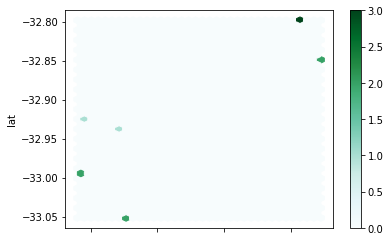

In [18]:
#visual check using lon/lat: bad
df.plot.hexbin(x='lon',y='lat',gridsize=35)
# df.plot.hexbin(x='lon',y='lat',C='depth_m',gridsize=35)

<AxesSubplot:xlabel='e_utm56s', ylabel='n_utm56s'>

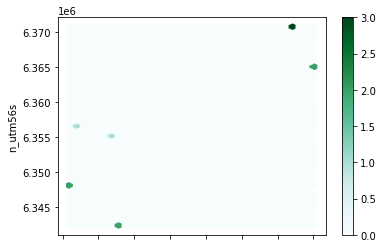

In [19]:
#visual check using x,y: good
df.plot.hexbin(x='e_utm56s',y='n_utm56s',gridsize=35)
# df.plot.hexbin(x='e_utm56s',y='n_utm56s',C='depth_m',gridsize=35)

In [ ]:
#Lon histogram
print(df['n_utm56s'].describe())
depth_bin10 = df['n_utm56s'].value_counts(bins=10)
print(depth_bin10)
df['n_utm56s'].plot.hist(bins=10);

In [ ]:
#Lon histogram
print(df['e_utm56s'].describe())
depth_bin10 = df['e_utm56s'].value_counts(bins=10)
print(depth_bin10)
df['e_utm56s'].plot.hist(bins=10);

In [ ]:
#Lon histogram
print(df['lon'].describe())
depth_bin10 = df['lon'].value_counts(bins=10)
print(depth_bin10)
df['lon'].plot.hist(bins=10);

In [ ]:
#Lat histogram
print(df['lat'].describe())
depth_bin10 = df['lat'].value_counts(bins=10)
print(depth_bin10)
df['lat'].plot.hist(bins=10);

In [ ]:
df.describe()

In [ ]:
#depth distribution
import numpy as np
import matplotlib.pyplot as plt
#pile chart of sediment type distribution
fig, ax1 = plt.subplots(figsize = (10,8)) 
colors = ['b','g','r','c','m','y','olive','gold','wheat','navy'] #we know that there are 4 types
labels = list(depth_bin10.index)
values_fraction = np.round(depth_bin10.values*100/150,2)
explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
ax1.pie(values_fraction,colors=colors,labels=labels,explode=explode,
        autopct='%1.1f%%',counterclock=True,shadow=True)
plt.title('SVP Depth range')
ax1.legend(labels, loc = 0) 
plt.tight_layout() 
plt.show()


In [ ]:
labels_str = [str(i) for i in labels]
labels_str[-1] = '(19.9, 28.5]'
plt.bar(labels_str,depth_bin10.values)
plt.xticks(rotation=30)
plt.show()

#### 1d Convert to spatially enable dataframe - spatial pandas
20210226_Not working when exporting to shp file


In [20]:
from arcgis.features import GeoAccessor, GeoSeriesAccessor

In [ ]:
#drop col SHAPE before convert to spatial data frame

In [21]:
# help(df.drop)
# df = df.drop(columns=['SHAPE'])
df.columns

Index(['sampling_date', 'time_utc', 'date_lcl', 'time_lcl', 'sample_name',
       'lat', 'lon', 'e_utm56s', 'n_utm56s', 'depth_m', 'recovereddateutc',
       'recoveredtimeutc', 'recovereddatelcl', 'recoveredtimelcl', 'days',
       'data_url', 'remarks', 'equipment_name', 'penetrate', 'recovery',
       'report_url', 'sample_desc'],
      dtype='object')

In [22]:
sdf = pd.DataFrame.spatial.from_xy(df=df,
                                    x_column='e_utm56s',
                                    y_column='n_utm56s',
                                    sr=32756)
#                                     sr=4326)
sdf.iloc[[0,-1]]

,sampling_date,time_utc,date_lcl,time_lcl,sample_name,lat,lon,e_utm56s,n_utm56s,depth_m,...,recoveredtimelcl,days,data_url,remarks,equipment_name,penetrate,recovery,report_url,sample_desc,SHAPE
11,07/12/2020,10:35:00,07/12/2020,21:35:00,CM1,-32.798333,152.113333,416981.995762,6.370722e+06,25,...,17:48:00,38.84,11_FinalDeliverables\05_Tide\04_CurrentMeters\CM1,,Current Meter,NaN,NaN,NaN,NaN,"{""spatialReference"": {""wkid"": 32756}, ""x"": 416..."
7,09/12/2020,05:18:00,09/12/2020,16:18:00,TG4 - Redhead Point Deep,-33.051667,151.856667,393253.964870,6.342404e+06,96,...,12:50:00,36.86,11_FinalDeliverables\05_Tide\02_SeabedMountedT...,98m water depth,"Bottom Mounted Tide Gauge, Level TROLL 700",0.0,100.0,,,"{""spatialReference"": {""wkid"": 32756}, ""x"": 393..."


In [23]:
sdf_iloc = sdf.iloc[[0,len(sdf)/5,len(sdf)*2.5/5,len(sdf)*4/5,-1]]
sdf_iloc
# sdf_iloc[['comment', 'index', 'svp_file', 'date','svp_url','sample_num', 'svp_source','e_utm56s','n_utm56s']]

,sampling_date,time_utc,date_lcl,time_lcl,sample_name,lat,lon,e_utm56s,n_utm56s,depth_m,...,recoveredtimelcl,days,data_url,remarks,equipment_name,penetrate,recovery,report_url,sample_desc,SHAPE
11,07/12/2020,10:35:00,07/12/2020,21:35:00,CM1,-32.798333,152.113333,416981.995762,6.370722e+06,25,...,17:48:00,38.84,11_FinalDeliverables\05_Tide\04_CurrentMeters\CM1,,Current Meter,NaN,NaN,NaN,NaN,"{""spatialReference"": {""wkid"": 32756}, ""x"": 416..."
2,08/12/2020,23:50:00,01/01/1900,11:00:00,GNSSBouy01,-32.798333,152.113333,416981.995762,6.370722e+06,0,...,07:00:00,8.84,11_FinalDeliverables\05_Tide\03_GNSS_TidalBuoy...,at TG1 – Telegraph Shoal,"GNSS Tide Bouy, Hemisphere S631",0.0,100.0,,,"{""spatialReference"": {""wkid"": 32756}, ""x"": 416..."
10,27/12/2020,02:02:00,28/12/2020,13:02:00,GNSSBouy04,-33.051667,151.856667,393253.964870,6.342404e+06,98,...,09:48:00,5.87,11_FinalDeliverables\05_Tide\03_GNSS_TidalBuoy...,at TG4 Redhead Point Deep,"GNSS Tide Bouy, Hemisphere S631",0.0,100.0,,,"{""spatialReference"": {""wkid"": 32756}, ""x"": 393..."
1,08/12/2020,22:38:00,09/12/2020,09:38:00,TG2 - Stockton Bight N,-32.850000,152.145000,419993.353905,6.365018e+06,107,...,16:10:00,37.27,11_FinalDeliverables\05_Tide\02_SeabedMountedT...,95m water depth,"Bottom Mounted Tide Gauge, Level TROLL 700",0.0,100.0,,,"{""spatialReference"": {""wkid"": 32756}, ""x"": 419..."
7,09/12/2020,05:18:00,09/12/2020,16:18:00,TG4 - Redhead Point Deep,-33.051667,151.856667,393253.964870,6.342404e+06,96,...,12:50:00,36.86,11_FinalDeliverables\05_Tide\02_SeabedMountedT...,98m water depth,"Bottom Mounted Tide Gauge, Level TROLL 700",0.0,100.0,,,"{""spatialReference"": {""wkid"": 32756}, ""x"": 393..."


##### Project from WGS84 to UTM56S: already in UTM56S

In [24]:
sdf.SHAPE.head()

11    {"spatialReference": {"wkid": 32756}, "x": 416...
3     {"spatialReference": {"wkid": 32756}, "x": 391...
2     {"spatialReference": {"wkid": 32756}, "x": 416...
8     {"spatialReference": {"wkid": 32756}, "x": 419...
6     {"spatialReference": {"wkid": 32756}, "x": 386...
Name: SHAPE, dtype: geometry

In [25]:
sdf.spatial.sr

{'wkid': 32756}

In [ ]:
#project to 32756 UTM56S
sdf.spatial.project(32756)
print(sdf.spatial.sr)

In [26]:
sdf.spatial.full_extent

(386024.86554639076, 6342404.338187949, 419993.3539045712, 6370721.50651768)

#### 1e visual check with spatial df

In [27]:
# sdf.spatial.plot()
sdf.spatial.plot(col='depth_m',renderer_type = 'c',class_count=5)

MapView(layout=Layout(height='400px', width='100%'))

#### 1e export 2 shp file - not work

In [ ]:
out_shp = r'E:\HIPP\11_Deliverables\03_Bathymetry\08_SeabedTexture_And_AncillaryLayers\SI1001SamplesUTM56Ssdf2shp.shp'
sdf.spatial.to_featureclass(out_shp)

In [ ]:
os.listdir('E:\\HIPP\\11_Deliverables\\03_Bathymetry\\08_SeabedTexture_And_AncillaryLayers')

In [ ]:
#read in again to check
sdf2 = pd.DataFrame.spatial.from_featureclass(out_shp)
sdf2.iloc[[0,50,100,-1]]

In [ ]:
m2 = GIS().map(zoomlevel=10.5)
m2.center=[sdf2.lat.mean(),sdf.lon.mean()]
m2.legend = True
m2

In [ ]:
sdf2.spatial.plot(map_widget=m2,
                 col='class',
                 renderer_type = 'u',
                 symbol_style='d',
                 marker_size=10,
                 symbol_type='simple'
                )

#### Export to csv - using normal pandas

In [29]:
#use pandas with no index
out_csv=r'E:\HIPP\11_Deliverables\06_Oceanography\01_DeployedEquipment\DeployedEquipment_UTM56S_SSDM.csv'
sdf.to_csv(out_csv,index=False)
sdf_iloc = sdf.iloc[[0,len(sdf)/5,len(sdf)*2.5/5,len(sdf)*4/5,-1]]
sdf
# sdf_iloc[['index', 'date', 'depth', 'svp_file','e_utm56s','n_utm56s', 'svp_source','comment','enter_prof']]

,sampling_date,time_utc,date_lcl,time_lcl,sample_name,lat,lon,e_utm56s,n_utm56s,depth_m,...,recoveredtimelcl,days,data_url,remarks,equipment_name,penetrate,recovery,report_url,sample_desc,SHAPE
11,07/12/2020,10:35:00,07/12/2020,21:35:00,CM1,-32.798333,152.113333,416981.995762,6.370722e+06,25,...,17:48:00,38.84,11_FinalDeliverables\05_Tide\04_CurrentMeters\CM1,,Current Meter,0.0,0.0,NaN,NaN,"{""spatialReference"": {""wkid"": 32756}, ""x"": 416..."
3,09/12/2020,02:47:00,09/12/2020,13:48:00,CM2,-32.938333,151.843333,391870.890200,6.354956e+06,32,...,19:30:00,78.69,11_FinalDeliverables\05_Tide\04_CurrentMeters\CM2,,Current Meter,0.0,100.0,,,"{""spatialReference"": {""wkid"": 32756}, ""x"": 391..."
2,08/12/2020,23:50:00,01/01/1900,11:00:00,GNSSBouy01,-32.798333,152.113333,416981.995762,6.370722e+06,0,...,07:00:00,8.84,11_FinalDeliverables\05_Tide\03_GNSS_TidalBuoy...,at TG1 – Telegraph Shoal,"GNSS Tide Bouy, Hemisphere S631",0.0,100.0,,,"{""spatialReference"": {""wkid"": 32756}, ""x"": 416..."
8,22/12/2020,13:48:00,01/01/1900,11:00:00,GNSSBouy02,-32.850000,152.145000,419993.353905,6.365018e+06,0,...,11:54:00,3.44,11_FinalDeliverables\05_Tide\03_GNSS_TidalBuoy...,at TG2 Stockton Bight N,"GNSS Tide Bouy, Hemisphere S631",0.0,100.0,,,"{""spatialReference"": {""wkid"": 32756}, ""x"": 419..."
6,09/12/2020,03:45:00,10/12/2020,14:45:00,GNSSBouy03,-32.996667,151.780000,386024.865546,6.348422e+06,35,...,12:20:00,13.90,11_FinalDeliverables\05_Tide\03_GNSS_TidalBuoy...,at TG3 – Redhead Point E,"GNSS Tide Bouy, Hemisphere S631",0.0,100.0,,,"{""spatialReference"": {""wkid"": 32756}, ""x"": 386..."
10,27/12/2020,02:02:00,28/12/2020,13:02:00,GNSSBouy04,-33.051667,151.856667,393253.964870,6.342404e+06,98,...,09:48:00,5.87,11_FinalDeliverables\05_Tide\03_GNSS_TidalBuoy...,at TG4 Redhead Point Deep,"GNSS Tide Bouy, Hemisphere S631",0.0,100.0,,,"{""spatialReference"": {""wkid"": 32756}, ""x"": 393..."
9,25/12/2020,23:24:00,26/12/2020,10:24:00,NewcastlePort_TideGauge,-32.923833,151.789000,386772.847603,6.356506e+06,0,...,07:30:00,8.97,11_FinalDeliverables\05_Tide\03_GNSS_TidalBuoy...,Established permanent tide gauge serving port ...,Vega Puls 62 Radar,0.0,100.0,,,"{""spatialReference"": {""wkid"": 32756}, ""x"": 386..."
0,07/12/2020,10:35:00,07/12/2020,21:35:00,TG1 - Telegraph Shoal,-32.798333,152.113333,416981.995762,6.370722e+06,25,...,17:48:00,38.84,11_FinalDeliverables\05_Tide\02_SeabedMountedT...,15m water depth,"Bottom Mounted Tide Gauge, Level TROLL 700",0.0,100.0,,,"{""spatialReference"": {""wkid"": 32756}, ""x"": 416..."
1,08/12/2020,22:38:00,09/12/2020,09:38:00,TG2 - Stockton Bight N,-32.850000,152.145000,419993.353905,6.365018e+06,107,...,16:10:00,37.27,11_FinalDeliverables\05_Tide\02_SeabedMountedT...,95m water depth,"Bottom Mounted Tide Gauge, Level TROLL 700",0.0,100.0,,,"{""spatialReference"": {""wkid"": 32756}, ""x"": 419..."
5,09/12/2020,03:38:00,09/12/2020,14:38:00,TG3 - Redhead Point E,-32.996667,151.780000,386024.865546,6.348422e+06,35,...,MISSING,78.65,11_FinalDeliverables\05_Tide\02_SeabedMountedT...,33m water depth Equipment lost due to fishing ...,"Bottom Mounted Tide Gauge, Level TROLL 700",0.0,100.0,,,"{""spatialReference"": {""wkid"": 32756}, ""x"": 386..."


### Step 2: using XYTableToPoint to convert csv file into ESRI shp format

#### 2.1 Convert E,N coordinate data to shp file using arcpy.management.XYTableToPoint (csv2shp)

In [30]:
out_feature_class = out_csv[:-3] + "shp"
out_feature_class

'E:\\HIPP\\11_Deliverables\\06_Oceanography\\01_DeployedEquipment\\DeployedEquipment_UTM56S_SSDM.shp'

In [31]:
import arcpy
arcpy.env.overwriteOutput = True
#csv2shp_UTM56S

out_csv=r'E:\HIPP\11_Deliverables\06_Oceanography\01_DeployedEquipment\DeployedEquipment_UTM56S_SSDM.csv'
in_table = out_csv
out_feature_class = out_csv[:-3] + "shp"
x_coords = "e_utm56s"
y_coords = "n_utm56s"
z_coords = None
sr = arcpy.SpatialReference(32756) #CRS: UTM56S 32756
try: arcpy.management.XYTableToPoint(in_table, out_feature_class,
                                x_coords, y_coords, z_coords,
                                sr)
except Exception as e: print(e)

# Print the total rows
print(arcpy.GetCount_management(out_feature_class))

11


#### 2.2 Check results using quick visualisation

In [32]:
#readin using sdf to test the table and geometry
import pandas as pd
from arcgis.mapping import show_styles, display_colormaps
from arcgis.gis import GIS
print(out_feature_class)
arcpy.env.workspace = r"E:\HIPP\11_Deliverables\06_Oceanography\01_DeployedEquipment"
sdf_test = pd.DataFrame.spatial.from_featureclass(out_feature_class)
# sdf_test.spatial.plot()
sdf_test.spatial.plot(col='depth_m',renderer_type = 'c',class_count=5)

E:\HIPP\11_Deliverables\06_Oceanography\01_DeployedEquipment\DeployedEquipment_UTM56S_SSDM.shp


MapView(layout=Layout(height='400px', width='100%'))

In [ ]:
sdf_test

#### Convert from csv to shp file using WGS84 coordinate information

#### This operation required open with notebook in arcgis pro
#edit wrong points using arcgis pro then export dbf to new csv file. then reimport csv file to shp file.

In [ ]:
#testing readin again and display the data from SSDM geodatabase using spatial enable dataframe